**Import modules for this project**

In [17]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs

The necessary modules are imported for this project. sklearn is a machine learning library for Python, and it includes modules for data processing modeling, and evaluation. pandas and numpy are additional libraries for data manipulation and analysis. matplotlib is a visualization library for creating plots and graphs. make_blobs function is used to generate simulated dataset.



**Create a simulated dataset**

In [18]:
centers = [[2, 4], [6, 6], [1, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150, 
                          centers=np.array(centers),
                          random_state=1)

A simulated dataset is created using the make_blobs function. The make_blobs function generates a set of points with labels assigned to them. The simulated dataset consists of 150 points that are generated from three clusters. The centers of these clusters are defined by the centers variable. The n_classes variable is set to the number of centers. The random_state parameter ensures that the data is generated randomly in a reproducible manner.

**Split the data into Train and Test(80:20)**

In [19]:
res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=14)
train_data, test_data, train_labels, test_labels = res 

The simulated data is split into training and testing sets using the train_test_split function from sklearn. The train_test_split function randomly shuffles and splits the data into training and testing sets. The train_size and test_size parameters are set to 0.8 and 0.2, respectively, to create an 80/20 split. The random_state parameter is set to ensure that the data is split in a reproducible manner.

In [20]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# classifier "out of the box", no parameters
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels)

KNeighborsClassifier()

A K-nearest neighbors (KNN) classifier is created and trained on the training data. The KNeighborsClassifier function is used to create the classifier. The fit method is used to train the classifier on the training data.

**Perform a KNN analysis of the simulated data**

In [21]:
# print some interested metrics
print("Predictions from the classifier:")
learn_data_predicted = knn.predict(train_data)
print(learn_data_predicted)
print("Target values:")
print(train_labels)
print(accuracy_score(learn_data_predicted, train_labels))

Predictions from the classifier:
[2 0 2 2 1 2 2 2 1 0 0 0 1 1 2 1 2 2 2 2 2 2 0 2 0 0 0 0 2 0 1 0 1 0 2 1 0
 1 0 0 0 0 1 1 2 0 1 0 1 1 1 1 2 0 0 0 2 1 0 0 2 2 1 0 2 0 1 0 1 1 1 0 2 1
 2 1 2 1 0 1 0 1 2 1 2 1 0 0 2 2 1 0 1 0 1 0 0 0 0 2 2 2 0 1 1 2 1 2 1 1 0
 2 2 1 2 0 1 1 2 1]
Target values:
[2 0 2 2 1 2 2 2 1 0 0 0 1 1 2 1 2 2 2 2 2 2 0 2 0 0 0 0 2 0 1 0 1 0 2 1 0
 1 0 0 0 0 1 1 2 0 1 0 1 1 1 1 2 0 0 0 2 1 0 0 2 2 1 0 2 0 1 0 1 1 1 0 2 1
 2 1 2 1 0 1 0 1 2 1 2 1 0 0 2 2 1 0 1 0 1 0 0 0 0 2 2 2 0 1 1 2 1 2 1 1 0
 2 2 1 2 0 1 1 2 1]
1.0


The trained KNN classifier is used to make predictions on the training data. The predict method is used to generate predictions for the training data and the accuracy_score function is used to calculate the accuracy of the predictions.

In [22]:
# KNN using some specific parameters. 
knn2 = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='minkowski',
                            p=2,         # p=2 is equivalent to euclidian distance
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=3, 
                            weights='uniform')

knn.fit(train_data, train_labels) 
test_data_predicted = knn.predict(test_data)
print(accuracy_score(test_data_predicted, test_labels))

1.0


**Accuracy is 1.0**

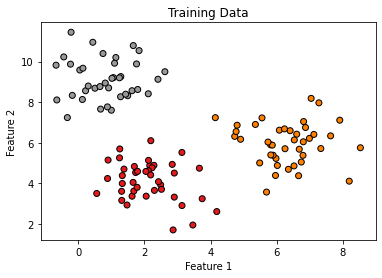

In [23]:
# Plot the data
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data')
plt.show()

The above scatter plot of the training data, with different colors representing different classes.

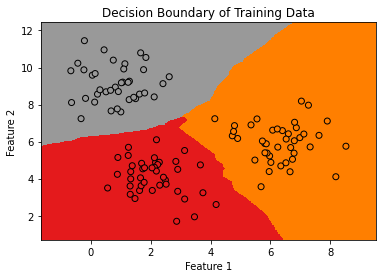

In [24]:
# Plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Set1, shading='auto')

# Plot the training points
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Training Data')
plt.show()


The above plot of the decision boundary of the KNN model, with the training data is represented by a colored background, with the color indicating the predicted class.